# Decision Tree Example

### 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd 

# 모델 라이브러리 선언
from sklearn import datasets, tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import pandas as pd

url = 'https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/cars.csv'
featuresData = pd.read_csv(url)#, index_col=0)
featuresData.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


### 2. 특성선정 및 데이터 분리

In [2]:
featuresData.corr()

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [3]:
# 상관관계 확인
corrDf = featuresData.corr()
corrDf.head()

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685


In [4]:
# 인덱스컬럼 초기화
corrResult = corrDf.reset_index()

In [5]:
corrResult

,index,age,gender,miles,debt,income,sales
0,age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
1,gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
2,miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
3,debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
4,income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
5,sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [6]:
# 상관관계 계수 비율 선정
featuresStd = 0.5

In [7]:
label = "sales"

In [8]:
features = list(corrResult [ (abs(corrResult[label]) > featuresStd) &
                              (abs(corrResult[label]) != 1) ]['index'])
features

['miles', 'debt', 'income']

In [9]:
label = ['sales']
label

['sales']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
trainingData_features, \
testData_features,\
trainingData_label,\
testData_label,\
trainingData_all,\
testData_all = \
    train_test_split(featuresData[features],
                     featuresData[label],
                     featuresData,
                     test_size=0.3,
                     random_state=1)

In [12]:
trainingData_features.head()

,miles,debt,income
718,47,16771,9160
720,10,6796,4264
341,28,0,1987
291,27,1074,2918
46,14,9592,1305


In [13]:
print(trainingData_features.shape)
print(trainingData_label.shape)
print(testData_features.shape)
print(testData_label.shape)

(674, 3)
(674, 1)
(289, 3)
(289, 1)


### 3. 모델선언 및 학습

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [15]:
model_method = RandomForestRegressor(n_estimators=100, random_state=1)

In [16]:
# rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# rf.fit(X_train, y_train)

In [17]:
# Define Model depth= 100~200
#model_method = tree.DecisionTreeRegressor(random_state=1)

In [18]:
# Learning (Feature & Label)
model = model_method.fit(trainingData_features, trainingData_label)

C:\Users\kopo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [19]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

### 4. 예측

In [20]:
# 샘플 예측

In [21]:
miles =  32
debt = 3000
income = 5000

In [22]:
testdata = pd.DataFrame( [ [      miles,debt,income]     ]     )

In [23]:
predict = model.predict(testdata)

In [24]:
predict

array([11851.66])

### [실습] 5. 데이터 정리

In [25]:
predict = model.predict(testData_features)

In [26]:
len(predict)

289

In [27]:
testData_all.head()

,age,gender,miles,debt,income,sales
241,28,1,20,414,9900,5265
854,53,0,32,51908,7169,23894
527,57,1,32,9503,5479,9319
906,33,1,23,5809,5548,13722
345,52,1,29,15752,6277,22145


In [28]:
testData_all["PREDICT_RF"] = predict

C:\Users\kopo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
testData_all.sort_index(inplace=True)

C:\Users\kopo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'ax2_value')

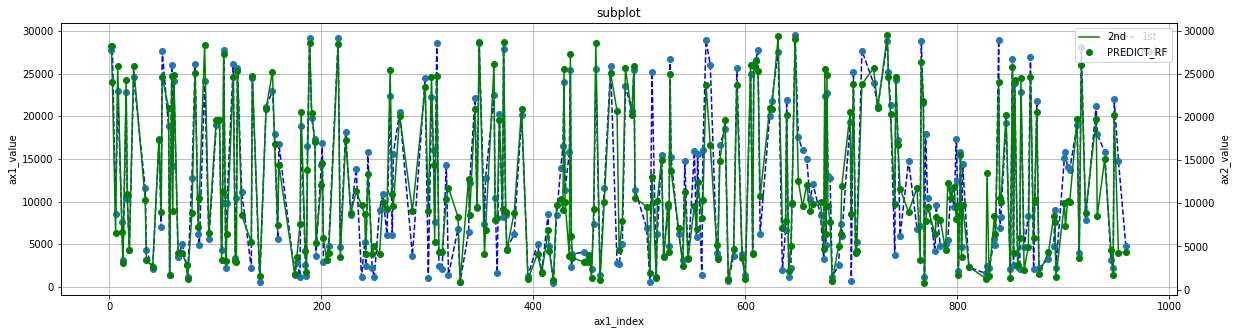

In [34]:
#필요 라이브러리 정의
import matplotlib.pyplot as plt
%matplotlib inline

# 팝업 창 활용하여 차트 시연
x=testData_all.index
y = testData_all.sales
y2 = testData_all.PREDICT_RF

# 이중축
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,1,1)
#figure, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(x,y, 'b--',lw=1.5, label = '1st')
ax1.plot(x,y, 'o')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylabel('ax1_value')
ax1.set_xlabel('ax1_index')
plt.title('subplot')
ax2 = ax1.twinx()
ax2.plot(x,y2, 'g', lw=1.5, label='2nd')
ax2.plot(x,y2, 'go')
ax2.legend(loc=0)
ax2.set_ylabel('ax2_value')

### 6. 정확도 측정

In [38]:
import math

In [39]:
mean_absolute_error(testData_all['sales'], testData_all['PREDICT_RF'])  

2319.2584775086507

In [40]:
math.sqrt(mean_squared_error(testData_all['sales'], testData_all['PREDICT_RF']) )

3431.889474145427

In [42]:
r2_score(testData_all['sales'], testData_all['PREDICT_RF'])  

0.8535761101317971